![JohnSnowLabs](https://nlp.johnsnowlabs.com/assets/images/logo.png)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/JohnSnowLabs/nlu/blob/master/examples/colab/Training/binary_text_classification/NLU_training_sentiment_classifier_demo_natural_disasters.ipynb)


# Training a Sentiment Analysis Classifier with NLU 
## 2 Class Natural Disasters Sentiment Classifer Training
With the [SentimentDL model](https://nlp.johnsnowlabs.com/docs/en/annotators#sentimentdl-multi-class-sentiment-analysis-annotator)  from Spark NLP you can achieve State Of the Art results on any multi class text classification problem 

This notebook showcases the following features : 

- How to train the deep learning classifier
- How to store a pipeline to disk
- How to load the pipeline from disk (Enables NLU offline mode)

You can achieve these results or even better on this dataset with training data:


<br>

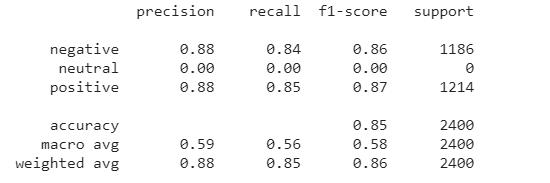

You can achieve these results or even better on this dataset with test  data:


<br>


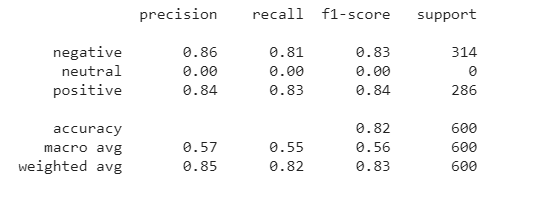

# 1. Install Java 8 and NLU

In [ ]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import nlu

--2021-05-05 05:38:43--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1671 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.63K  --.-KB/s    in 0s      

2021-05-05 05:38:43 (30.6 MB/s) - written to stdout [1671/1671]

Installing  NLU 3.0.0 with  PySpark 3.0.2 and Spark NLP 3.0.1 for Google Colab ...
     |████████████████████████████████| 204.8MB 73kB/s 
     |████████████████████████████████| 153kB 45.7MB/s 
     |████████████████████████████████| 204kB 19.8MB/s 
     |████████████████████████████████| 204kB 41.4MB/s 


# 2. Download Disaster  Sentiment dataset 
https://www.kaggle.com/vstepanenko/disaster-tweets
#Context

The file contains over 11,000 tweets associated with disaster keywords like “crash”, “quarantine”, and “bush fires” as well as the location and keyword itself. The data structure was inherited from Disasters on social media

The tweets were collected on Jan 14th, 2020.

Some of the topics people were tweeting:

The eruption of Taal Volcano in Batangas, Philippines
Coronavirus
Bushfires in Australia
Iran downing of the airplane flight PS752
Disclaimer: The dataset contains text that may be considered profane, vulgar, or offensive.

In [ ]:
! wget http://ckl-it.de/wp-content/uploads/2021/02/tweets.csv


--2021-05-05 05:41:04--  http://ckl-it.de/wp-content/uploads/2021/02/tweets.csv
Resolving ckl-it.de (ckl-it.de)... 217.160.0.108, 2001:8d8:100f:f000::209
Connecting to ckl-it.de (ckl-it.de)|217.160.0.108|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1207952 (1.2M) [text/csv]
Saving to: ‘tweets.csv’

tweets.csv          100%[===================>]   1.15M   654KB/s    in 1.8s    

2021-05-05 05:41:07 (654 KB/s) - ‘tweets.csv’ saved [1207952/1207952]



In [ ]:
import pandas as pd
train_path = '/content/tweets.csv'

train_df = pd.read_csv(train_path,sep=",", encoding='latin-1')
# the text data to use for classification should be in a column named 'text'
columns=['text','y']
train_df = train_df.dropna()
positive = train_df[train_df['y']==("positive")].iloc[:1500]
negative = train_df[train_df['y']==("negative")].iloc[:1500]
positive = positive.append(negative, ignore_index = True)
positive = positive.sample(frac=1).reset_index(drop=True)
train_df = positive
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(train_df, test_size=0.2)
train_df

,Unnamed: 0,Ã¯Â»Â¿id,keyword,location,text,target,y
2310,2375.0,6350.0,heat%20wave,"Chandigarh, India",Bihar District Magistrate Issues Order to Clos...,1.0,positive
2044,1607.0,3937.0,destroyed,"Scotland, but like at the top","YOU THERE, PACHIRISU PUNK, PREPARE TO BE DESTR...",0.0,negative
2473,809.0,272.0,annihilated,USA,A devastating and thorough refutation of and N...,0.0,negative
1369,152.0,3817.0,desolate,United States Air Force,bubby finally gonna help with desolate while i...,0.0,negative
1880,305.0,4609.0,earthquake,Chile,Temblor: mb 4.5 SOUTHEAST OF EASTER ISLAND: Ma...,1.0,positive
...,...,...,...,...,...,...,...
1531,2759.0,110.0,aftershock,NYC,The magnitude 5.9 quake in #PuertoRico this mo...,1.0,positive
903,182.0,3256.0,debris,Republic of the Philippines,Hello everyone. Tito Sotto is wrong. Cloud see...,0.0,negative
2621,287.0,4008.0,destruction,"Recife, Brasil","Bear witness to his destruction. West Coast, #...",0.0,negative
1235,5131.0,2863.0,curfew,Vehari,KASHMIR STILL UNDER CURFEW Ã°ÂÂÂÃ°ÂÂÂÃ°Â...,1.0,positive


# 3. Train Deep Learning Classifier using nlu.load('train.sentiment')

You dataset label column should be named 'y' and the feature column with text data should be named 'text'

In [ ]:
import nlu 
from sklearn.metrics import classification_report
# load a trainable pipeline by specifying the train. prefix  and fit it on a datset with label and text columns
# by default the Universal Sentence Encoder (USE) Sentence embeddings are used for generation
trainable_pipe = nlu.load('train.sentiment')
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])

# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')
#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       1.00      0.20      0.33        25
     neutral       0.00      0.00      0.00         0
    positive       0.86      0.96      0.91        25

    accuracy                           0.58        50
   macro avg       0.62      0.39      0.41        50
weighted avg       0.93      0.58      0.62        50



,y,trained_sentiment,text,sentence,Ã¯Â»Â¿id,target,document,trained_sentiment_confidence,keyword,origin_index,sentence_embedding_use,Unnamed: 0,location
0,positive,positive,Bihar District Magistrate Issues Order to Clos...,[Bihar District Magistrate Issues Order to Clo...,6350.0,1.0,Bihar District Magistrate Issues Order to Clos...,0.714817,heat%20wave,2310,"[0.01817215047776699, -0.042255766689777374, -...",2375.0,"Chandigarh, India"
1,negative,negative,"YOU THERE, PACHIRISU PUNK, PREPARE TO BE DESTR...","[YOU THERE, PACHIRISU PUNK, PREPARE TO BE DEST...",3937.0,0.0,"YOU THERE, PACHIRISU PUNK, PREPARE TO BE DESTR...",0.624722,destroyed,2044,"[0.01567729189991951, 0.00028937371098436415, ...",1607.0,"Scotland, but like at the top"
2,negative,neutral,A devastating and thorough refutation of and N...,[A devastating and thorough refutation of and ...,272.0,0.0,A devastating and thorough refutation of and N...,0.516126,annihilated,2473,"[0.030531354248523712, 0.018328234553337097, -...",809.0,USA
3,negative,negative,bubby finally gonna help with desolate while i...,[bubby finally gonna help with desolate while ...,3817.0,0.0,bubby finally gonna help with desolate while i...,0.635754,desolate,1369,"[-0.010298581793904305, -0.023482605814933777,...",152.0,United States Air Force
4,positive,positive,Temblor: mb 4.5 SOUTHEAST OF EASTER ISLAND: Ma...,"[Temblor: mb 4.5 SOUTHEAST OF EASTER ISLAND:, ...",4609.0,1.0,Temblor: mb 4.5 SOUTHEAST OF EASTER ISLAND: Ma...,0.688311,earthquake,1880,"[-0.07005153596401215, -0.042087431997060776, ...",305.0,Chile
5,positive,positive,Human body parts have been found in a bag on a...,[Human body parts have been found in a bag on ...,1333.0,1.0,Human body parts have been found in a bag on a...,0.672013,body%20bag,936,"[-0.01760876551270485, -0.07565091550350189, -...",1765.0,"Dublin, Ireland"
6,negative,neutral,"JFC!!! Racist comment ! I guess all ""lazy"" may...","[JFC!!!, Racist comment !, I guess all ""lazy"" ...",1709.0,0.0,"JFC!!! Racist comment ! I guess all ""lazy"" may...",0.577475,buildings%20burning,2032,"[0.023510590195655823, 0.002154689282178879, -...",2141.0,Southern OBX
7,positive,positive,14/17:27 EST Severe Thunderstorm Warning for p...,[14/17:27 EST Severe Thunderstorm Warning for ...,10191.0,1.0,14/17:27 EST Severe Thunderstorm Warning for p...,0.727776,thunderstorm,647,"[-0.0552973710000515, 0.024097146466374397, -0...",5108.0,"Queensland, Australia"
8,negative,positive,Roadworks are co-ordinated and approved by a g...,[Roadworks are co-ordinated and approved by a ...,4845.0,0.0,Roadworks are co-ordinated and approved by a g...,0.669093,emergency%20services,1081,"[-0.05318903550505638, 0.018101226538419724, -...",2228.0,Edinburgh
9,positive,positive,"Iran Protests: 1,500 killed 5,000 Injured 7,00...","[Iran Protests: 1,500 killed 5,000 Injured 7,0...",6776.0,1.0,"Iran Protests: 1,500 killed 5,000 Injured 7,00...",0.727720,injured,1759,"[0.03859921544790268, -0.010697060264647007, -...",4651.0,Ohio River Valley


# 4. Test the fitted pipe on new example

In [ ]:
fitted_pipe.predict("All the buildings in the capital were destroyed")

,document,trained_sentiment_confidence,origin_index,trained_sentiment,sentence_embedding_use,sentence
0,All the buildings in the capital were destroyed,0.697948,0,positive,"[0.01043090783059597, 0.06007970869541168, -0....",[All the buildings in the capital were destroyed]


## 5. Configure pipe training parameters

In [ ]:
trainable_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['sentiment_dl'] has settable params:
pipe['sentiment_dl'].setMaxEpochs(1)                 | Info: Maximum number of epochs to train | Currently set to : 1
pipe['sentiment_dl'].setLr(0.005)                    | Info: Learning Rate | Currently set to : 0.005
pipe['sentiment_dl'].setBatchSize(64)                | Info: Batch size | Currently set to : 64
pipe['sentiment_dl'].setDropout(0.5)                 | Info: Dropout coefficient | Currently set to : 0.5
pipe['sentiment_dl'].setEnableOutputLogs(True)       | Info: Whether to use stdout in addition to Spark logs. | Currently set to : True
pipe['sentiment_dl'].setThreshold(0.6)               | Info: The minimum threshold for the final result otheriwse it will be neutral | Currently set to : 0.6
pipe['sentiment_dl'].setThresholdLabel('neutral')    | Info: In case the score is less than threshold, what should be the label. Default i

## 6. Retrain with new parameters

In [ ]:
# Train longer!
trainable_pipe['sentiment_dl'].setMaxEpochs(5)  
fitted_pipe = trainable_pipe.fit(train_df.iloc[:50])
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df.iloc[:50],output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

preds

              precision    recall  f1-score   support

    negative       0.96      0.96      0.96        25
     neutral       0.00      0.00      0.00         0
    positive       1.00      0.96      0.98        25

    accuracy                           0.96        50
   macro avg       0.65      0.64      0.65        50
weighted avg       0.98      0.96      0.97        50



,y,trained_sentiment,text,sentence,Ã¯Â»Â¿id,target,document,trained_sentiment_confidence,keyword,origin_index,sentence_embedding_use,Unnamed: 0,location
0,positive,positive,Bihar District Magistrate Issues Order to Clos...,[Bihar District Magistrate Issues Order to Clo...,6350.0,1.0,Bihar District Magistrate Issues Order to Clos...,0.970833,heat%20wave,2310,"[0.01817215047776699, -0.042255766689777374, -...",2375.0,"Chandigarh, India"
1,negative,negative,"YOU THERE, PACHIRISU PUNK, PREPARE TO BE DESTR...","[YOU THERE, PACHIRISU PUNK, PREPARE TO BE DEST...",3937.0,0.0,"YOU THERE, PACHIRISU PUNK, PREPARE TO BE DESTR...",0.982484,destroyed,2044,"[0.01567729189991951, 0.00028937371098436415, ...",1607.0,"Scotland, but like at the top"
2,negative,negative,A devastating and thorough refutation of and N...,[A devastating and thorough refutation of and ...,272.0,0.0,A devastating and thorough refutation of and N...,0.969792,annihilated,2473,"[0.030531354248523712, 0.018328234553337097, -...",809.0,USA
3,negative,negative,bubby finally gonna help with desolate while i...,[bubby finally gonna help with desolate while ...,3817.0,0.0,bubby finally gonna help with desolate while i...,0.985924,desolate,1369,"[-0.010298581793904305, -0.023482605814933777,...",152.0,United States Air Force
4,positive,positive,Temblor: mb 4.5 SOUTHEAST OF EASTER ISLAND: Ma...,"[Temblor: mb 4.5 SOUTHEAST OF EASTER ISLAND:, ...",4609.0,1.0,Temblor: mb 4.5 SOUTHEAST OF EASTER ISLAND: Ma...,0.973546,earthquake,1880,"[-0.07005153596401215, -0.042087431997060776, ...",305.0,Chile
5,positive,positive,Human body parts have been found in a bag on a...,[Human body parts have been found in a bag on ...,1333.0,1.0,Human body parts have been found in a bag on a...,0.974148,body%20bag,936,"[-0.01760876551270485, -0.07565091550350189, -...",1765.0,"Dublin, Ireland"
6,negative,negative,"JFC!!! Racist comment ! I guess all ""lazy"" may...","[JFC!!!, Racist comment !, I guess all ""lazy"" ...",1709.0,0.0,"JFC!!! Racist comment ! I guess all ""lazy"" may...",0.960352,buildings%20burning,2032,"[0.023510590195655823, 0.002154689282178879, -...",2141.0,Southern OBX
7,positive,positive,14/17:27 EST Severe Thunderstorm Warning for p...,[14/17:27 EST Severe Thunderstorm Warning for ...,10191.0,1.0,14/17:27 EST Severe Thunderstorm Warning for p...,0.981230,thunderstorm,647,"[-0.0552973710000515, 0.024097146466374397, -0...",5108.0,"Queensland, Australia"
8,negative,negative,Roadworks are co-ordinated and approved by a g...,[Roadworks are co-ordinated and approved by a ...,4845.0,0.0,Roadworks are co-ordinated and approved by a g...,0.755662,emergency%20services,1081,"[-0.05318903550505638, 0.018101226538419724, -...",2228.0,Edinburgh
9,positive,positive,"Iran Protests: 1,500 killed 5,000 Injured 7,00...","[Iran Protests: 1,500 killed 5,000 Injured 7,0...",6776.0,1.0,"Iran Protests: 1,500 killed 5,000 Injured 7,00...",0.982878,injured,1759,"[0.03859921544790268, -0.010697060264647007, -...",4651.0,Ohio River Valley


# 7. Try training with different Embeddings

In [ ]:
# We can use nlu.print_components(action='embed_sentence') to see every possibler sentence embedding we could use. Lets use bert!
nlu.print_components(action='embed_sentence')

For language <en> NLU provides the following Models : 
nlu.load('en.embed_sentence') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.tfhub_use') returns Spark NLP model tfhub_use
nlu.load('en.embed_sentence.use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.tfhub_use.lg') returns Spark NLP model tfhub_use_lg
nlu.load('en.embed_sentence.albert') returns Spark NLP model albert_base_uncased
nlu.load('en.embed_sentence.electra') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_small_uncased') returns Spark NLP model sent_electra_small_uncased
nlu.load('en.embed_sentence.electra_base_uncased') returns Spark NLP model sent_electra_base_uncased
nlu.load('en.embed_sentence.electra_large_uncased') returns Spark NLP model sent_electra_large_uncased
nlu.load('en.embed_sentence.bert') returns Spark NLP model sent_bert_base_uncased
nlu.load('en.embed_sentenc

In [ ]:
trainable_pipe = nlu.load('en.embed_sentence.small_bert_L12_768 train.sentiment')
# We need to train longer and user smaller LR for NON-USE based sentence embeddings usually
# We could tune the hyperparameters further with hyperparameter tuning methods like gridsearch
# Also longer training gives more accuracy
trainable_pipe['sentiment_dl'].setMaxEpochs(120)  
trainable_pipe['sentiment_dl'].setLr(0.0005) 
fitted_pipe = trainable_pipe.fit(train_df)
# predict with the trainable pipeline on dataset and get predictions
preds = fitted_pipe.predict(train_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

#preds

sent_small_bert_L12_768 download started this may take some time.
Approximate size to download 392.9 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
              precision    recall  f1-score   support

    negative       0.87      0.82      0.85      1206
     neutral       0.00      0.00      0.00         0
    positive       0.87      0.84      0.86      1194

    accuracy                           0.83      2400
   macro avg       0.58      0.56      0.57      2400
weighted avg       0.87      0.83      0.85      2400



# 7.1 evaluate on Test Data

In [ ]:
preds = fitted_pipe.predict(test_df,output_level='document')

#sentence detector that is part of the pipe generates sone NaNs. lets drop them first
preds.dropna(inplace=True)
print(classification_report(preds['y'], preds['trained_sentiment']))

              precision    recall  f1-score   support

    negative       0.84      0.82      0.83       294
     neutral       0.00      0.00      0.00         0
    positive       0.86      0.80      0.83       306

    accuracy                           0.81       600
   macro avg       0.56      0.54      0.55       600
weighted avg       0.85      0.81      0.83       600



# 8. Lets save the model

In [ ]:
stored_model_path = './models/classifier_dl_trained' 
fitted_pipe.save(stored_model_path)

Stored model in ./models/classifier_dl_trained


# 9. Lets load the model from HDD.
This makes Offlien NLU usage possible!   
You need to call nlu.load(path=path_to_the_pipe) to load a model/pipeline from disk.

In [ ]:
hdd_pipe = nlu.load(path=stored_model_path)

preds = hdd_pipe.predict('All the buildings in the capital were destroyed')
preds

,text,sentiment,document,origin_index,sentiment_confidence,sentence,sentence_embedding_from_disk
0,All the buildings in the capital were destroyed,[positive],All the buildings in the capital were destroyed,8589934592,[0.99480504],[All the buildings in the capital were destroyed],"[[-0.393466055393219, 0.33815130591392517, -0...."


In [ ]:
hdd_pipe.print_info()

The following parameters are configurable for this NLU pipeline (You can copy paste the examples) :
>>> pipe['document_assembler'] has settable params:
pipe['document_assembler'].setCleanupMode('shrink')                                    | Info: possible values: disabled, inplace, inplace_full, shrink, shrink_full, each, each_full, delete_full | Currently set to : shrink
>>> pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'] has settable params:
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setExplodeSentences(False)  | Info: whether to explode each sentence into a different row, for better parallelization. Defaults to false. | Currently set to : False
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setStorageRef('SentenceDetectorDLModel_c83c27f46b97')  | Info: storage unique identifier | Currently set to : SentenceDetectorDLModel_c83c27f46b97
pipe['sentence_detector@SentenceDetectorDLModel_c83c27f46b97'].setEncoder(com.johnsnowlabs.nlp.anno